In [1]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)
library('RColorBrewer')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
library(patchwork)

In [2]:
anno_col = list(
#     response_short = c(PRO = "rosybrown1", R = "lightgreen", '0' = 'gray95', PD = 'tomato'), 
#     treatment_group = c(ICI_PD1 = 'paleturquoise1', ICI_combo = 'turquoise', '0' = 'gray95'),
     sex = c(M = 'lightblue2', F = 'mistyrose'), 
     state = c(PRE = 'palegoldenrod', ON ='gold1', POST ='sandybrown'),
#      subtype = c(cutaneous = 'honeydew2', uveal = 'lightgoldenrodyellow', 
#                  mucosal = 'mistyrose2', 'unknown primary' = 'gray95'),
#      tissue = c(skin = 'lightskyblue1', breast = 'darkolivegreen3', liver = 'seagreen1',
#                  lymph = 'lightseagreen', brain = 'cyan', soft = 'steelblue1', colon = 'darkcyan',
#                 bone = 'seagreen3', '0' = 'gray95'),
    age = colorRampPalette(brewer.pal(4, "Blues")) (40),
    day = colorRampPalette(brewer.pal(4, "RdPu")) (40),
    pfs = colorRampPalette(brewer.pal(4, "Greys")) (40),
     ncells = colorRampPalette(brewer.pal(4, "Greens")) (40)  
               )

# Load object

In [3]:
obj <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.rds")


In [3]:
head(obj[[]])

,sample_ID,is_multiplet,cell_barcode,total_counts,percent_ribo,percent_heme,n_genes,compartment,general_cell_type,sample_ID_long,⋯,percent_mt,nCount_SCT,nFeature_SCT,integrated_snn_res.0.4,integrated_snn_res.0.6,seurat_clusters,integrated_snn_res.0.3,Ident,integrated_snn_res.0.2,integrated_snn_res.0.1
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
11807_CELL_771,11807,no,GGTGCGTAGCCACGTC-1,7568,0.2369186,0,2238,Immune,Myeloid,D18-11807,⋯,1.730973,8466,2222,6,6,0,0,cDC2,1,0
11807_CELL_782,11807,no,TATTACCGTTGAACTC-1,7279,0.1858772,0,2096,Immune,Myeloid,D18-11807,⋯,1.909603,8392,2083,0,6,0,3,cDC2,0,0
11807_CELL_812,11807,no,GCTTGAAAGATATGGT-1,6660,0.2379880,0,1995,Immune,Myeloid,D18-11807,⋯,2.222222,8334,1984,6,6,0,0,cDC2,1,0
11807_CELL_816,11807,no,CGAGCACCACCACGTG-1,6553,0.2169998,0,1869,Immune,Myeloid,D18-11807,⋯,2.151686,8324,1857,6,6,0,1,cDC2,0,0
11807_CELL_1280,11807,no,TACCTATGTCTCGTTC-1,1732,0.1934180,0,678,Immune,Myeloid,D18-11807,⋯,3.983834,7611,1310,6,6,0,0,cDC2,1,0
11808_CELL_97,11808,no,TGACGGCGTAGGCTGA-1,17794,0.1838822,0,3635,Immune,Myeloid,D18-11808,⋯,1.742160,3447,1341,7,7,1,1,cDC1,2,1


#  PCA & UMAP

In [5]:
obj <- RunPCA(obj, verbose = FALSE,  assay = "integrated")
obj <- RunUMAP(obj, reduction = "pca", dims = 1:30,verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


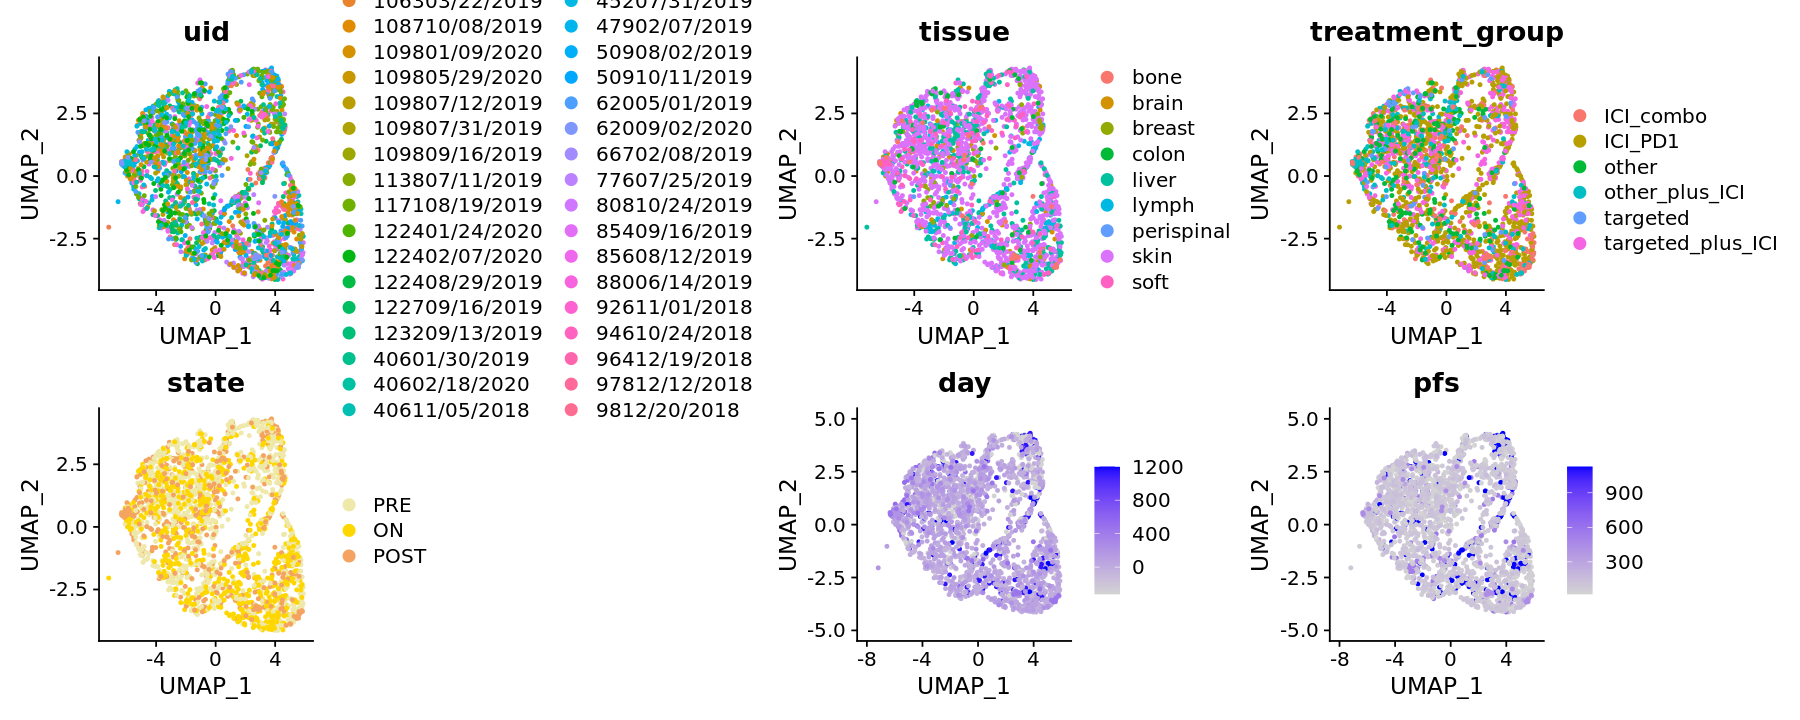

In [67]:
options(repr.plot.height = 6, repr.plot.width = 15)

p1 <- DimPlot(obj, reduction = "umap", group.by = "uid",   
              label.size = 3, repel = TRUE)
p2 <- DimPlot(obj, reduction = "umap", group.by = "tissue",  cols =anno_col$tissue ,
              label.size = 3, repel = TRUE)
p3 <- DimPlot(obj, reduction = "umap", group.by =  "treatment_group",  cols =anno_col$treatment_group , 
              label.size = 3, repel = TRUE)
p4 <- DimPlot(obj, reduction = "umap", group.by =  "state",  cols =anno_col$state , 
              label.size = 3, repel = TRUE)

p5 <- FeaturePlot(obj, features = c('day') ,  reduction = "umap", )
p6 <- FeaturePlot(obj, features = 'pfs' ,  reduction = "umap", )

p1+p2+p3+p4 +p5+p6

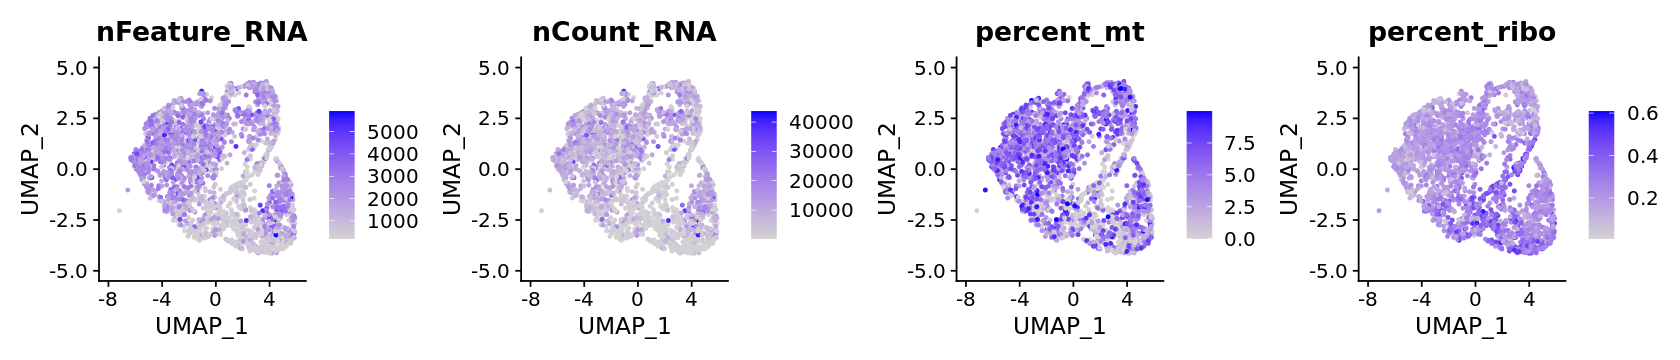

In [68]:
# QC
options(repr.plot.height = 3, repr.plot.width = 14)
FeaturePlot(obj, features = c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo" ),
            ncol = 4,
            reduction = "umap")

# cell marker

In [64]:
DefaultAssay(object = obj) <- "SCT"

In [65]:
features = c('CLEC9A','BATF3','XCR1', 'CD1C','FCER1A','HLA-DQA1',
                                  'LAMP3','CCR7', 'FSCN1', 'CD274' )

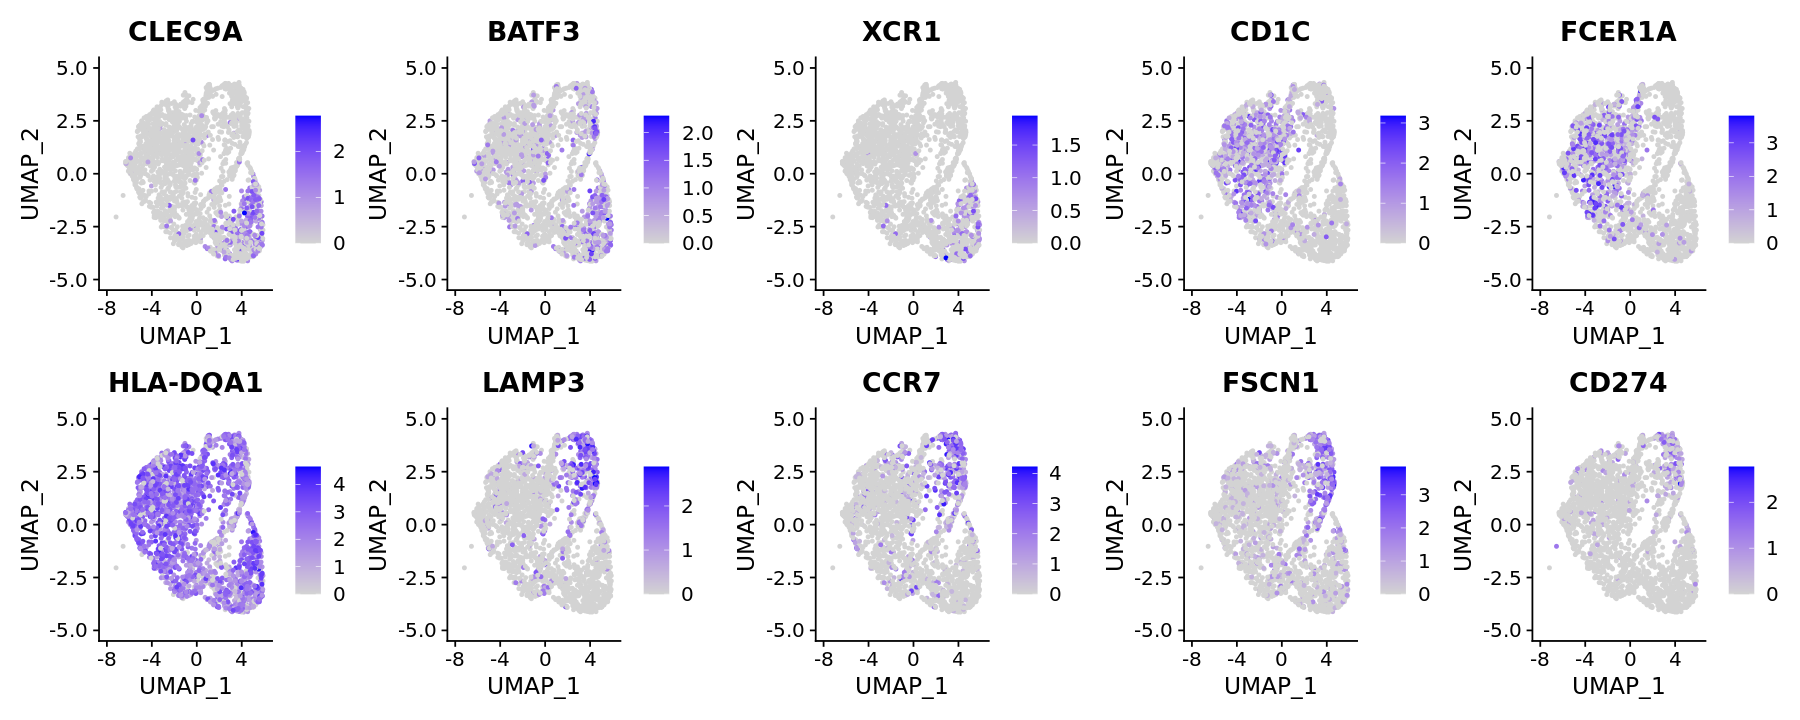

In [66]:
options(repr.plot.height = 6, repr.plot.width = 15)
FeaturePlot(obj, features = features, ncol = 5,
            reduction = "umap")

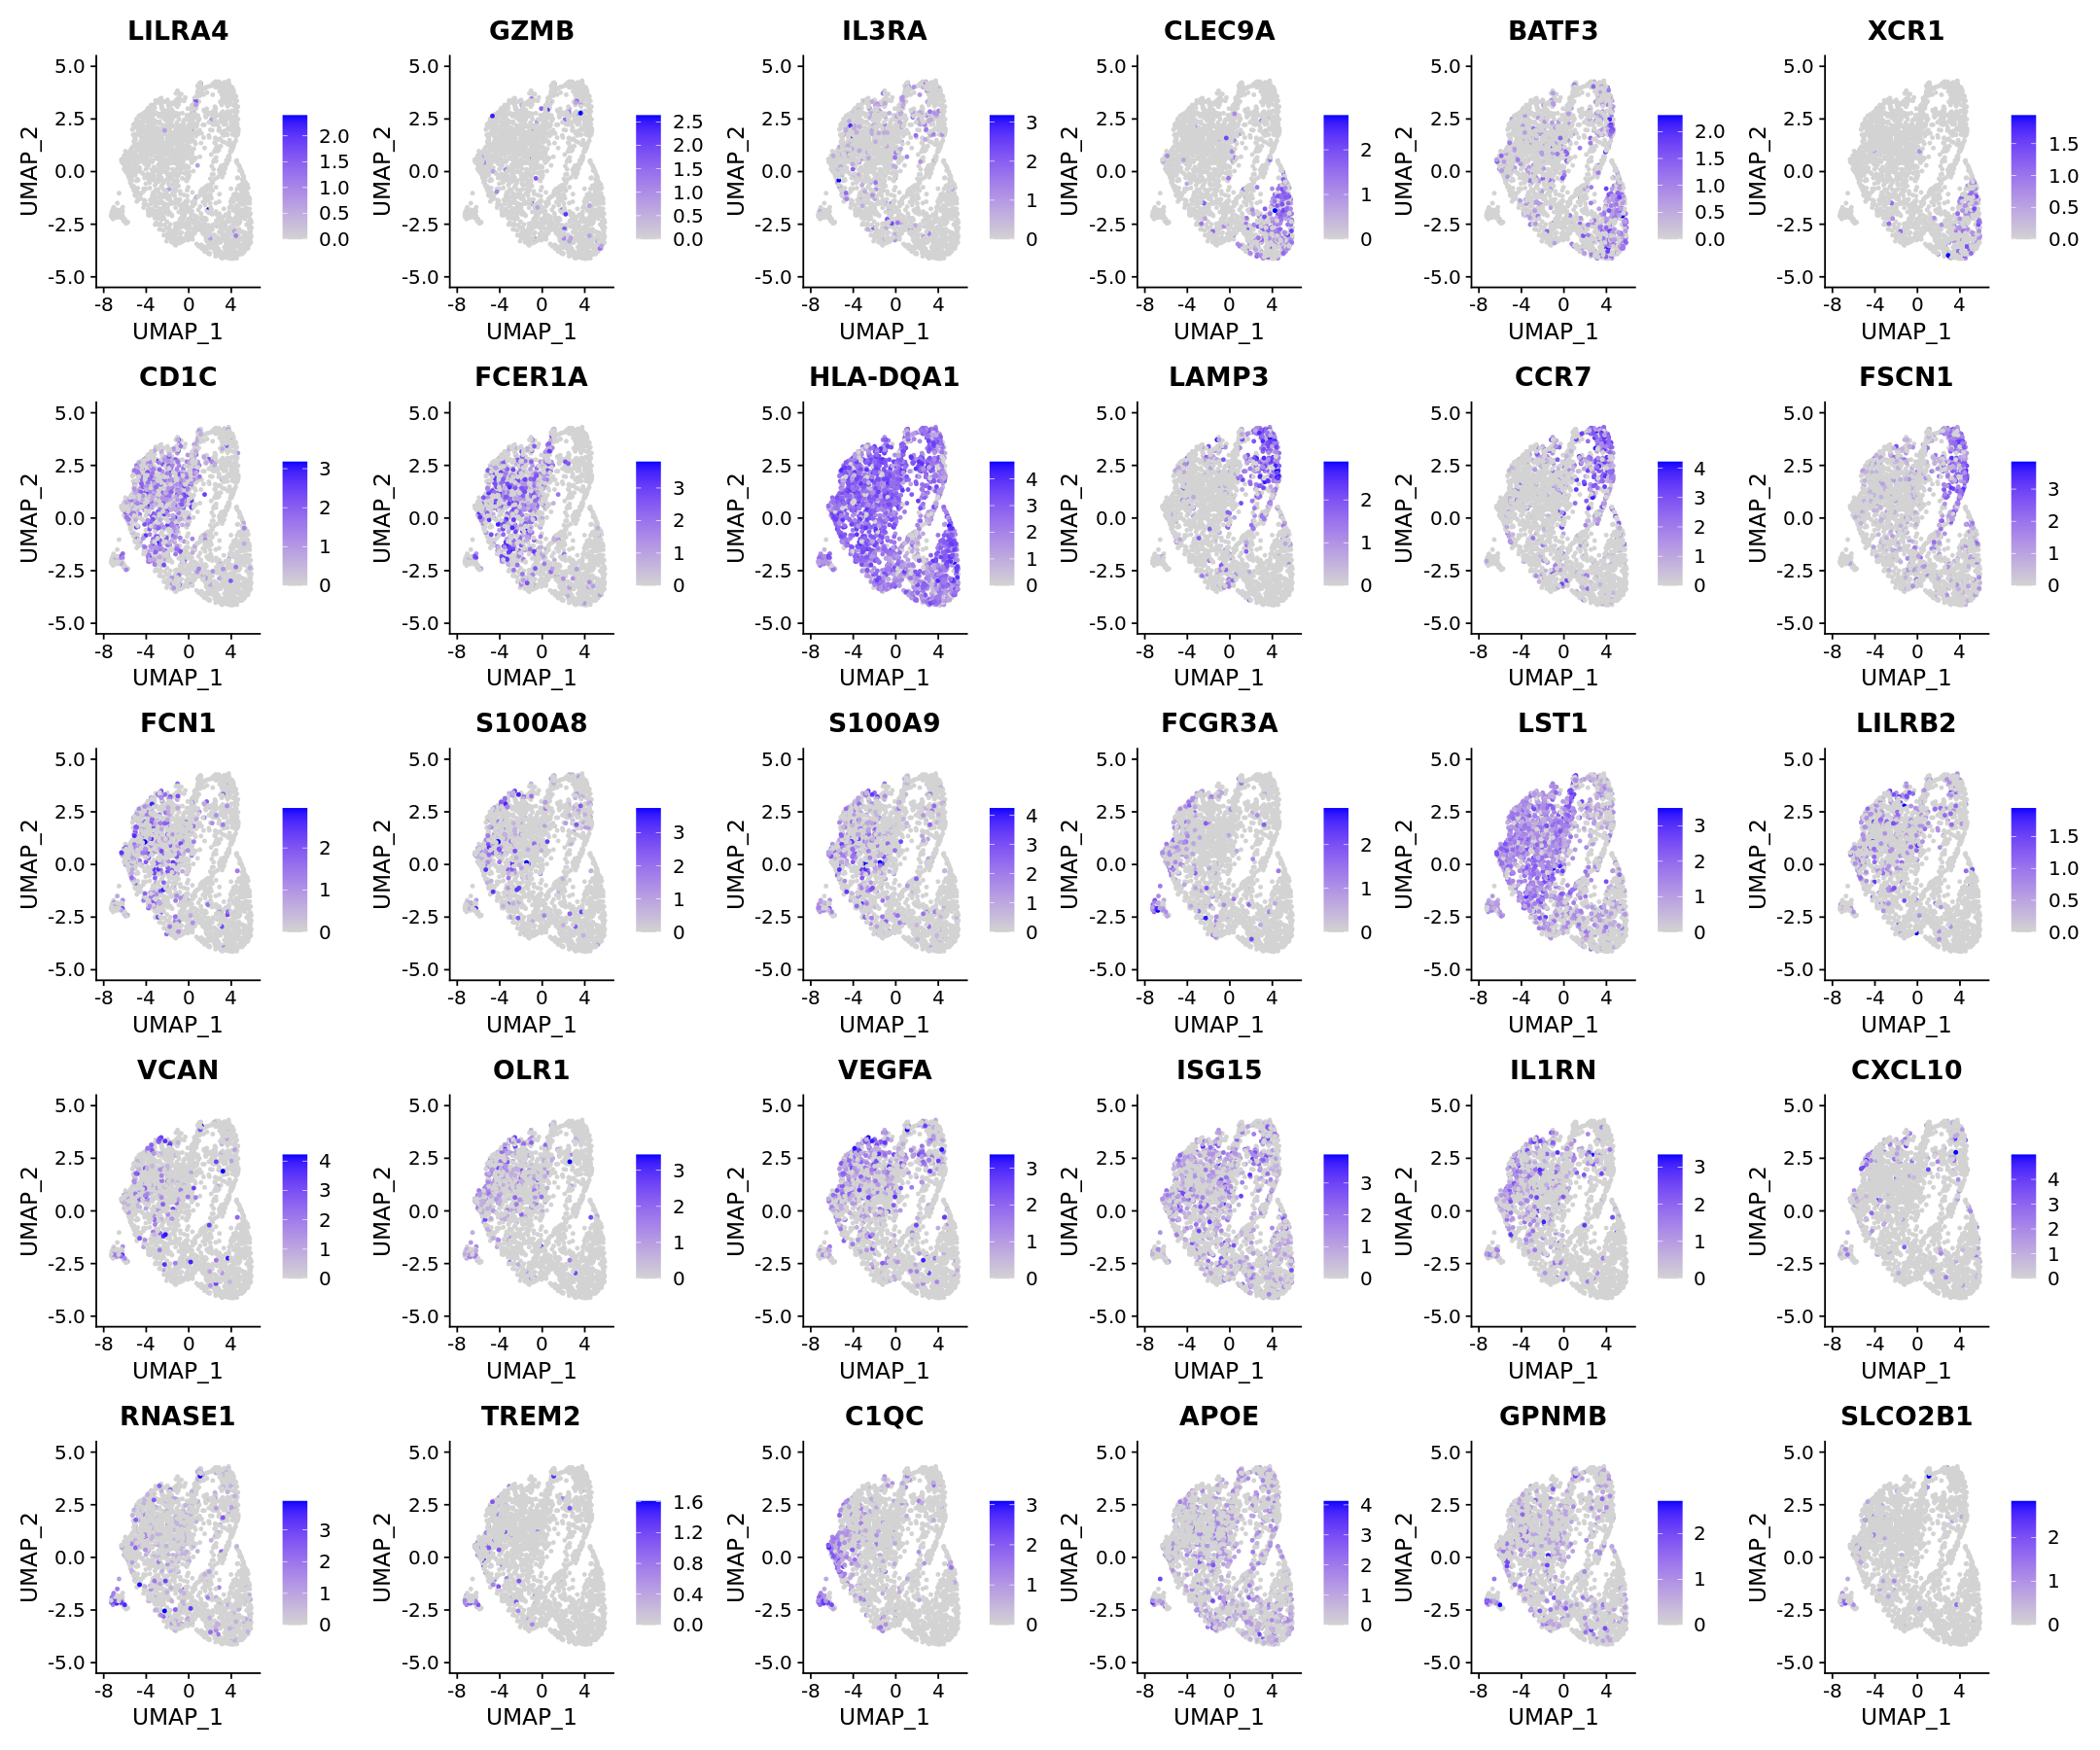

In [31]:
features = c('LILRA4','GZMB','IL3RA', 'CLEC9A','BATF3','XCR1', 'CD1C','FCER1A','HLA-DQA1',
                                  'LAMP3','CCR7', 'FSCN1', 'FCN1','S100A8','S100A9', 'FCGR3A','LST1','LILRB2',
             'VCAN','OLR1','VEGFA','ISG15','IL1RN','CXCL10','RNASE1','TREM2','C1QC','APOE','GPNMB','SLCO2B1')

options(repr.plot.height = 15, repr.plot.width = 18)
FeaturePlot(obj, features = features, ncol = 6,
            reduction = "umap")

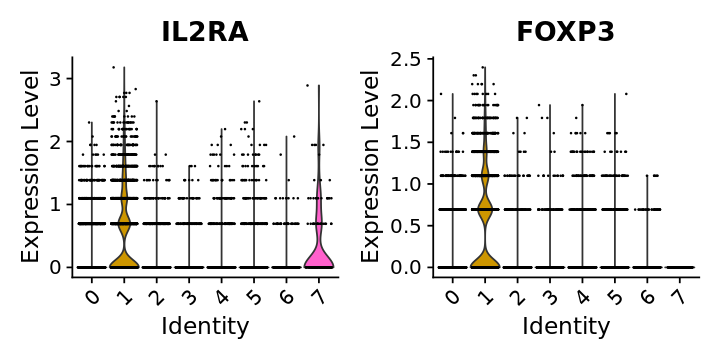

In [82]:
options(repr.plot.height = 3, repr.plot.width = 6)
VlnPlot(obj, features = c('IL2RA','FOXP3'), group.by =  'SCT_snn_res.0.4')

In [4]:
DefaultAssay(object = obj) <- "SCT"

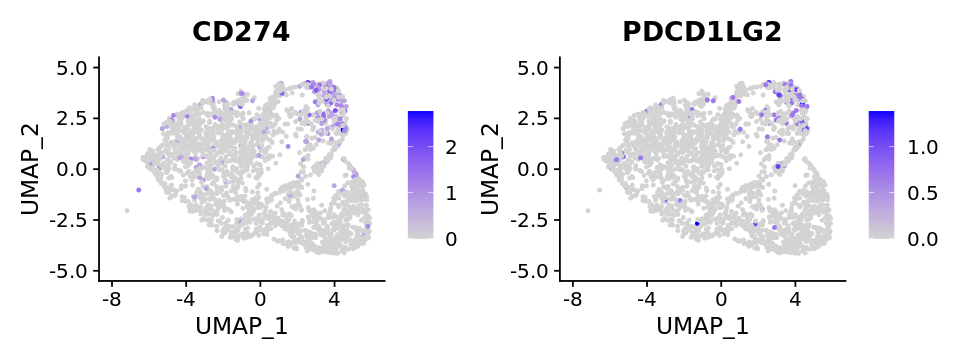

In [12]:
options(repr.plot.height = 3, repr.plot.width = 8)
FeaturePlot(obj, features = c( 'CD274','PDCD1LG2'), ncol = 2,
            reduction = "umap")

# DEG

In [4]:
Idents(obj) <- "Ident"
DefaultAssay(obj) <- "SCT" 

cDC3markers <- FindMarkers(obj, ident.1 = 'cDC3', min.pct = 0.25) %>% filter (avg_log2FC >0)

In [5]:
FindMarkers(obj, ident.1 = 'cDC3', min.pct = 0.25) %>% filter (p_val_adj <0.005) %>% nrow()

[1] 419

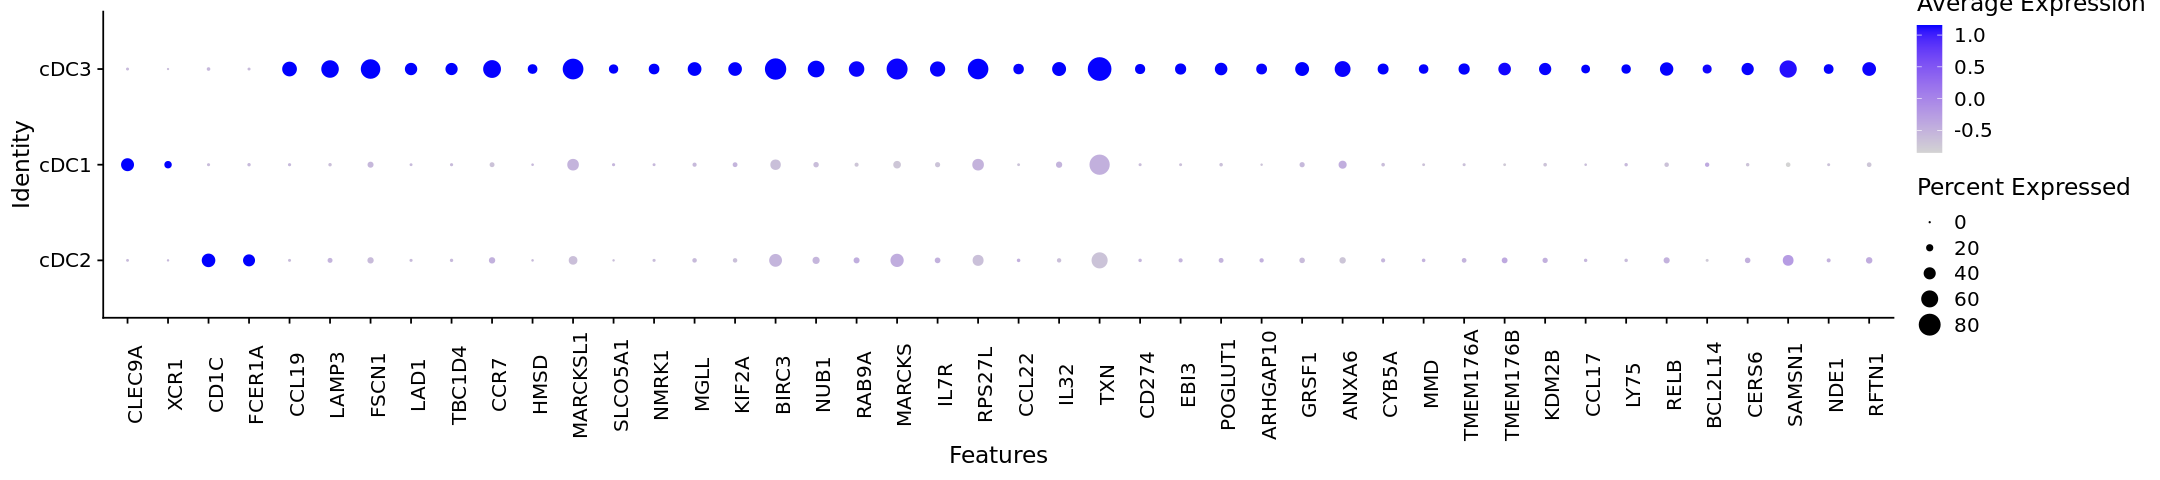

In [7]:
options(repr.plot.height = 4, repr.plot.width = 18)

DotPlot(obj, features = c('CLEC9A','XCR1', 'CD1C','FCER1A',rownames(cDC3markers)[1:40]))+
theme(axis.text.x = element_text(angle = 90))

In [14]:
p1 <- DimPlot(obj, reduction = "umap") 
p2 <- VlnPlot(obj, features = c('CLEC9A','XCR1', 'CD1C','FCER1A','LAMP3','FSCN1', 'CCL19', 'CCR7'), ncol = 4)
p3 <- DotPlot(obj, features = rownames(cDC3markers)[1:40])+ theme(axis.text.x = element_text(angle = 90))

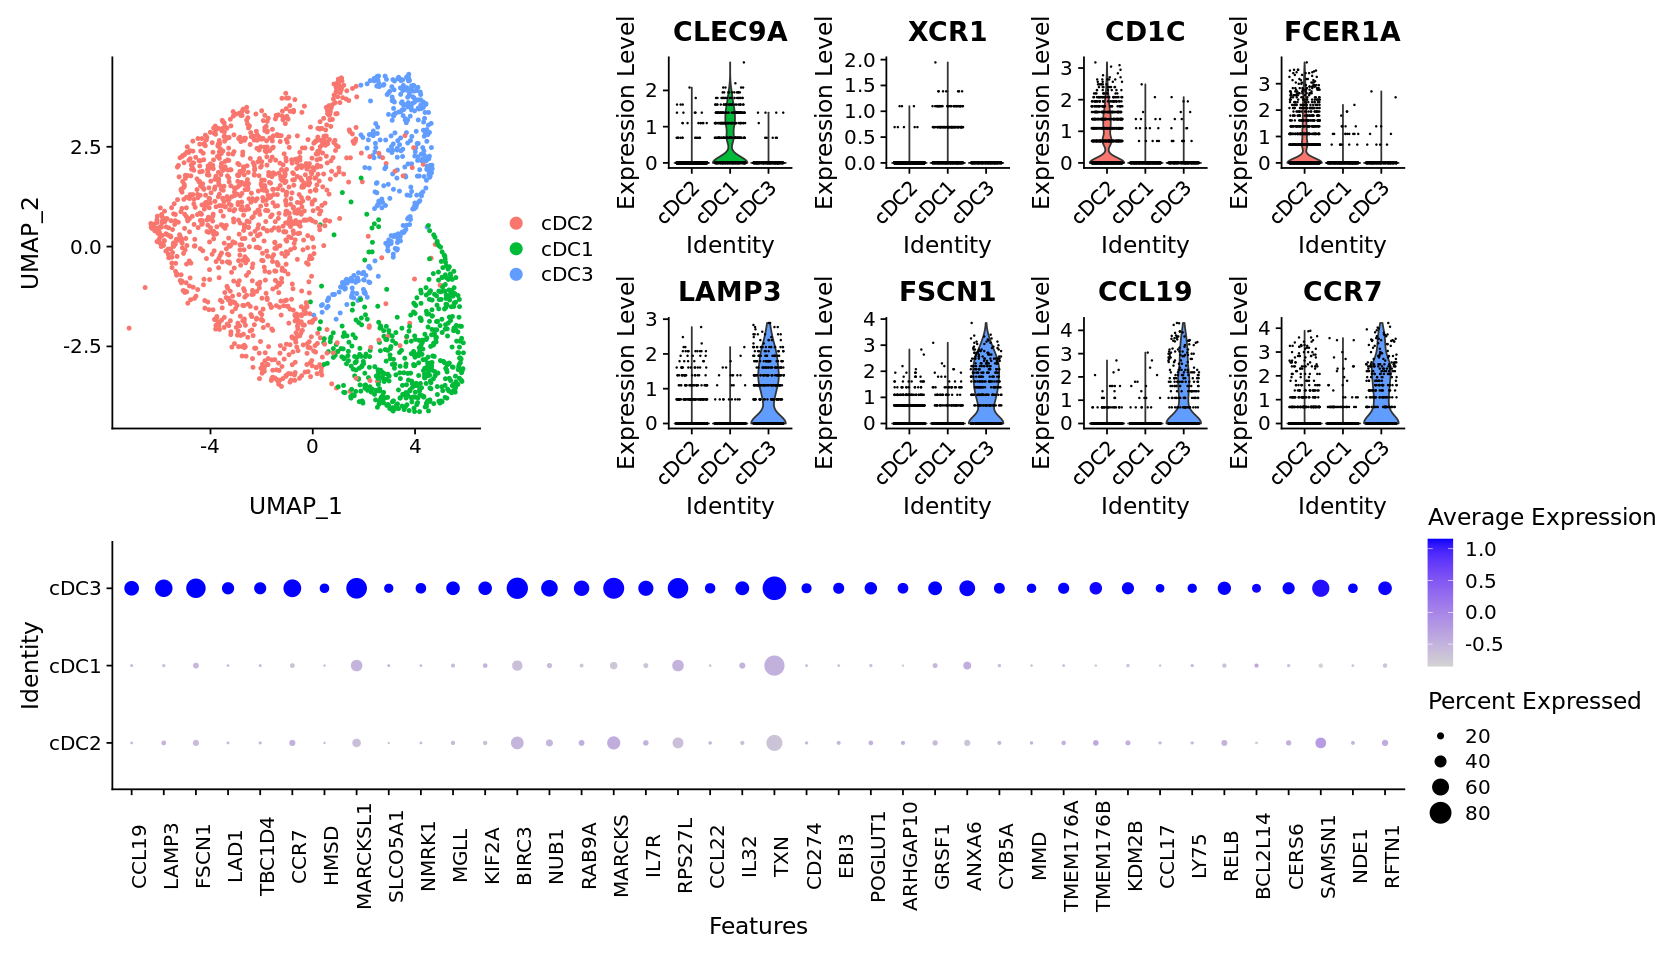

In [15]:
options(repr.plot.height = 8, repr.plot.width = 14)

((p1 + p2)+
 plot_layout(widths = c(1,2)))/ p3 +
 plot_layout(heights = c(1.5,1))

# Clustering

In [35]:
DefaultAssay(object = obj) <- "integrated"

In [36]:
# obj<- FindNeighbors(obj, dims = 1:30, reduction = 'pca')
obj<- FindClusters(obj, resolution = c(0.1))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2222
Number of edges: 82764

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9340
Number of communities: 4
Elapsed time: 0 seconds


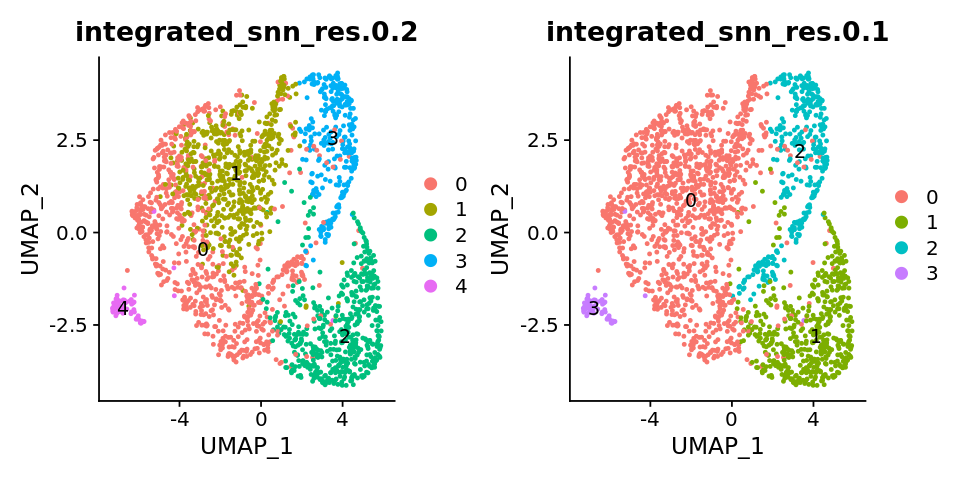

In [37]:
options(repr.plot.height = 4, repr.plot.width = 8)
p1 <- DimPlot(obj, reduction = "umap",group.by = "integrated_snn_res.0.2", label = TRUE)
p2 <- DimPlot(obj, reduction = "umap",group.by = "integrated_snn_res.0.1", label = TRUE)

p1+p2

In [38]:
Idents(object = obj) <- "integrated_snn_res.0.1"

In [39]:
obj <- subset(obj, subset = (integrated_snn_res.0.1 !=3))

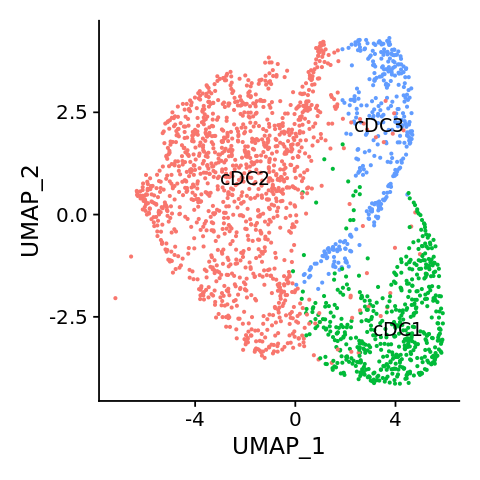

In [40]:
new.cluster.ids <- c("cDC2", 'cDC1', 'cDC3')
names(new.cluster.ids) <- levels(obj)
obj <- RenameIdents(obj, new.cluster.ids)
options(repr.plot.height = 4, repr.plot.width = 4)
DimPlot(obj, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [43]:
obj[["Ident"]] <- Idents( obj)

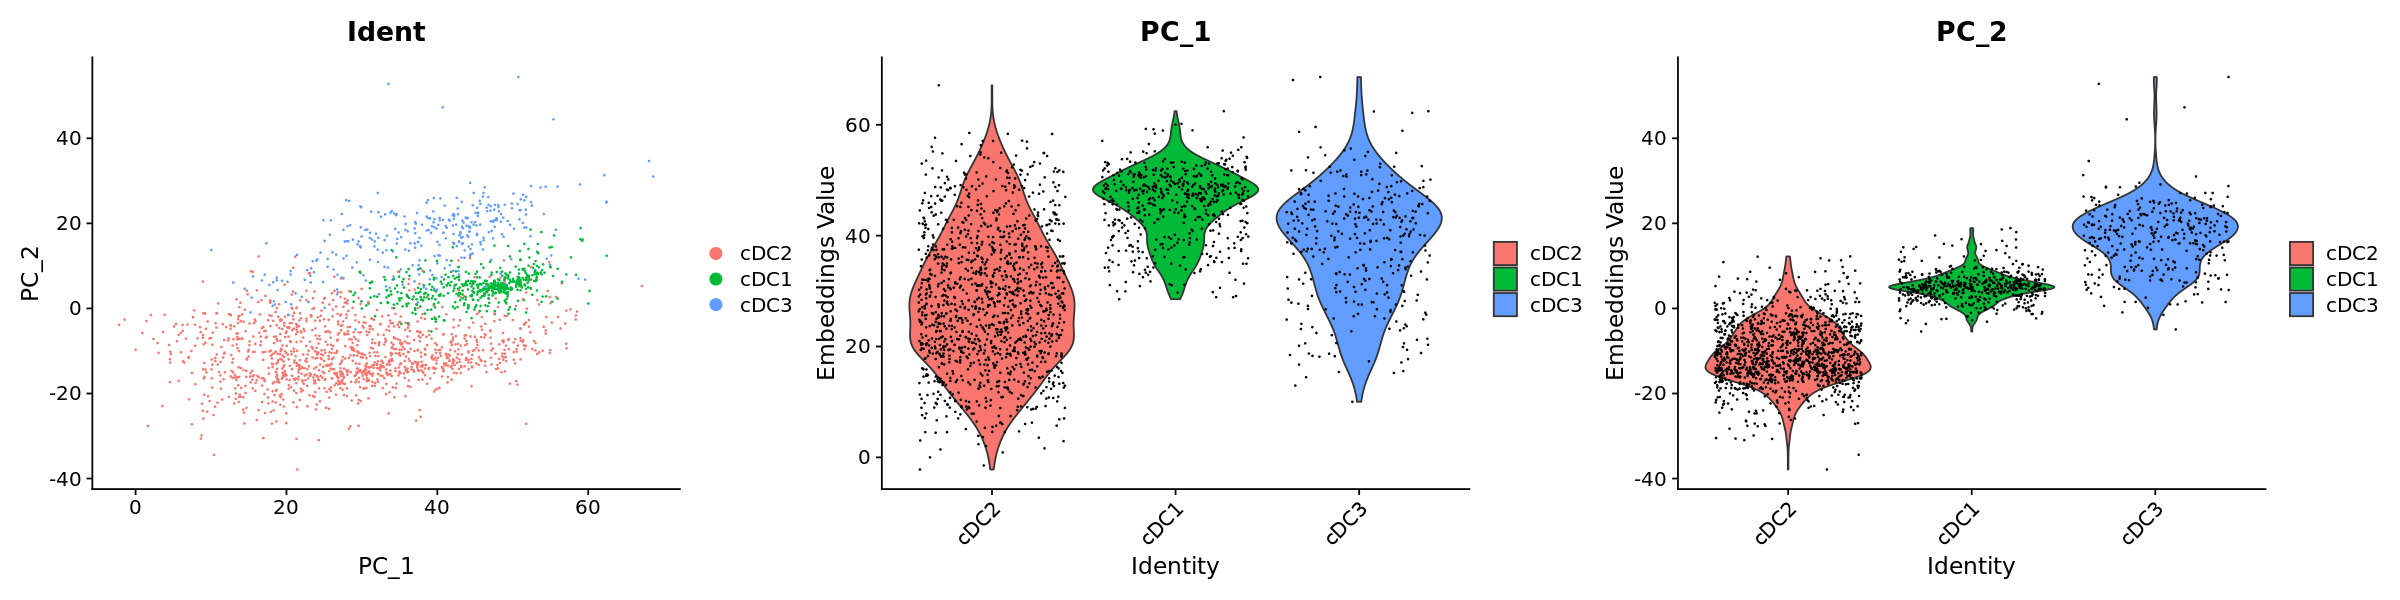

In [44]:
options(repr.plot.height = 5, repr.plot.width = 20)
p1 <- DimPlot(object = obj, reduction = "pca", pt.size = .1, group.by = "Ident")
p2 <- VlnPlot(object = obj, features = "PC_1", group.by = "Ident", pt.size = .1)
p3 <- VlnPlot(object = obj, features = "PC_2", group.by = "Ident", pt.size = .1)
p1+p2+p3

In [45]:
saveRDS(obj, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.rds")


# Cellrank

In [5]:
library(SeuratDisk)

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [9]:
i <- sapply(obj@meta.data, is.factor)
obj@meta.data[i] <- lapply(obj@meta.data[i], as.character)

In [12]:
SaveH5Seurat(obj,filename = "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.h5Seurat", overwrite = TRUE)
Convert("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.h5Seurat",
        dest = "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.h5ad", overwrite = TRUE)

Warning message:
“Overwriting previous file /net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cellrank/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.h5Seurat”
Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

No variable features found for SCT

No feature-level metadata found for SCT

Writing out SCTModel.list for SCT

Adding data for integrated

Adding scale.data for integrated

Adding variable features for integrated

No feature-level metadata found for integrated

Writing out SCTModel.list for integrated

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap


# survival 

In [ ]:
library("survminer")


In [41]:
names(obj@meta.data)

[1] "sample_ID"              "is_multiplet"           "cell_barcode"          
 [4] "total_counts"           "percent_ribo"           "percent_heme"          
 [7] "n_genes"                "compartment"            "general_cell_type"     
[10] "sample_ID_long"         "patient"                "uid"                   
[13] "age"                    "sex"                    "subtype"               
[16] "treatment_group"        "prior_therapy"          "state"                 
[19] "response"               "tissue"                 "day"                   
[22] "pfs"                    "nCount_RNA"             "nFeature_RNA"          
[25] "percent_mt"             "nCount_SCT"             "nFeature_SCT"          
[28] "integrated_snn_res.0.4" "integrated_snn_res.0.6" "seurat_clusters"       
[31] "integrated_snn_res.0.3" "Ident"                  "integrated_snn_res.0.2"
[34] "integrated_snn_res.0.1"

In [61]:
pfs <- read.csv("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cDC3_survival/cDCfrac_pfs.csv")

In [48]:
celltype_counts <- obj@meta.data[c('uid', 'Ident' )] %>% 
    count(uid, Ident) %>% 
    spread( key = uid, value = n)%>%
    replace(., is.na(.), 0)  %>%
    column_to_rownames('Ident')
cellFrac <- celltype_counts%>%t() %>% as.data.frame 
srow <- rowSums(cellFrac)
cellFrac <- cellFrac/srow 
cellFrac$uid <- rownames(cellFrac)

In [57]:
cellFrac$uid <- rownames(cellFrac)

In [62]:
pfs <- right_join(pfs, cellFrac) %>% mutate(cDC3level = ifelse(cDC3 > 0.15, "cDC3_high", "cDC3_low"))

Joining, by = "uid"



In [70]:
pfs %>% filter(cDC3 >0.185)

uid,response,pfs,censure_pfs,os,censure_os,treatment_group,cDC2,cDC1,cDC3,cDC3level
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
9812/20/2018,PD,68,1,204,1,other_plus_ICI,0.6388889,0.11111111,0.2500000,cDC3_high
88006/14/2019,PD,81,1,749,0,ICI_PD1,0.7384615,0.06153846,0.2000000,cDC3_high
66702/08/2019,PD,141,1,980,0,other,0.3000000,0.10000000,0.6000000,cDC3_high
50910/11/2019,R,1126,1,1850,0,ICI_PD1,0.5294118,0.23529412,0.2352941,cDC3_high
50908/02/2019,R,1126,1,1850,0,ICI_PD1,0.3055556,0.26851852,0.4259259,cDC3_high
40601/30/2019,PD,67,1,979,0,ICI_PD1,0.7500000,0.05357143,0.1964286,cDC3_high
122709/16/2019,R,529,1,649,0,ICI_PD1,0.5247525,0.16831683,0.3069307,cDC3_high
117108/19/2019,PD,84,1,359,0,targeted_plus_ICI,0.6040000,0.10000000,0.2960000,cDC3_high
109809/16/2019,R,110,1,304,1,targeted_plus_ICI,0.3333333,0.45833333,0.2083333,cDC3_high


In [66]:
write.csv(pfs, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/cDC3_survival/cDCfrac_pfs.csv")

In [ ]:
pfs <- pfs %>% mutate(cDC3level = ifelse(cDC3 > 0.185, "cDC3_high", "cDC3_low"))

In [ ]:
condition_fit <- survfit(Surv(pfs, censure_pfs) ~ cDC3level, data=pfs)
p <- ggsurvplot(condition_fit,   palette =
    c("#E7B800", "#2E9FDF"),# custom color palettes
  conf.int = TRUE,          # Add confidence interval
    pval=TRUE, risk.table = TRUE,
            risk.table.height = 0.25, # Useful to change when you have multiple groups
  ggtheme = theme_bw()      # Change ggplot2 theme
          )

pdf("survivalPlot_cDC3level_pfs_38samples.pdf")
print(p, newpage = FALSE)
dev.off()

In [ ]:
condition_fit_os <- survfit(Surv(os, censure_os) ~ cDC3level, data=pfs)
autoplot(condition_fit_os)
ggsave('survivalPlot_cDC3level_os_38samples.pdf')

In [ ]:
pfs_pd1 <- pfs %>% filter(treatment_group =='ICI_PD1')

condition_fit_pd1 <- survfit(Surv(pfs, censure_pfs) ~ cDC3level, data=pfs_pd1)
p_pd1 <- ggsurvplot(condition_fit_pd1,   palette =
    c("#E7B800", "#2E9FDF"),# custom color palettes
  conf.int = TRUE,          # Add confidence interval
    pval=TRUE, risk.table = TRUE,
            risk.table.height = 0.25, # Useful to change when you have multiple groups
  ggtheme = theme_bw()      # Change ggplot2 theme
          )
pdf("survivalPlot_cDC3level_pfs_antiPD1.pdf")
print(p_pd1, newpage = FALSE)
dev.off()